## Milestone 5:

This is the last milestone. So it'll be an occasion to enjoy seeing all the work you've done and what you learned in the process. And it'll also be the time to do the last bits of "packaging" and analysis.
In terms of packaging:
Instead of a zip file, you will submit the URL to your complete shared google drive repository. We would expect to see six folders:
- Data, containing the generated networks themselves, exported from NetworkX; plus the spreadsheet used as input for machine learning, which lists the networks and their measures. Note that there will be additional measures as specified below. The point for exporting the networks themselves is to avoid having to redo absolutely everything in order to just add in a few more measures later on.
- Python notebooks (containing only the final versions)
- Redhawk cluster (containing any script you may have created and/or README file)
- Results, containing two subfolders: machine learning and correlations (previous work goes in that). The machine learning folder needs one CSV file listing the algorithms (decision tree, SVM,random forest), the average + standard deviation for precision/accuracy/recall, and the best parameter values (obtained from the grid search). The point in structuring these results as a CSV is to make them easy to analyze later on rather than having a lot of small 'text-like' files.
- Report (the word file and any images you may have produced. Use track changes so I can see all edits that you've made for your final report. Don't worry if there are edits in lots of place.)
- Deprecated (anything you have made over time and wish to keep even though it's not part of the final product)

Your files are usually very well organized I have no doubt you're already in good shape to keep things clean. I'm using the same organization across the groups so I can also figure out what-goes-where.
A few things to clean and complete:
1) I've attached the notebook from another group that follows the process for a nested cross-fold validation. Please use this thorough process. That'll ensure robust results and also better results, since you'll actually use the outcome of your grid search optimization. It'll also organize your notebook so that you have one central function for the ML process instead of copy/pasted/tweaked versions.
2) Please address the comments made in your report by your peers and myself.
Final analyses
1) Please add a section "Results" to your report. It'll have two subsections:
- Correlations. It should narrate and show the work you've done on correlations. Right now you have one heat map, but you actually have produced several correlations. You also need to narrate them. Explain to the reader how you got these, what they represent, and the takeaway message.
- Machine learning. Present your results and explain them. Comment on the strengths (what's good in this work?) and on areas to improve. You'll likely end up with better results but still not perfect (I wouldn't count on 90% accuracy right away). So try to specifically point out what it'd take to get even better results. If you had a milestone #6, what would you "tell yourself" that needs to be done? Again, I'm looking for specifics, not just "we'll measure more stuff" or "we'll optimize better".
2) Move your background section (currently sitting at the end of the document) to be after the introduction. There are several comments to address in the background. Important additions here will be:
- a table summarizing the different studies. Which network centrality measures did they look at? How did they study relations between measures (machine learning? correlations -- which ones?). Which networks did they use? Did they measure characteristics of their networks -- which ones? What are the conclusions? This may end up being a full-page table, but that's fine.
- the last two studies that weren't read previously (one paragraph each, same as before).
- your suggestion about two more studies to read. I'm not asking you to read them. The sample I've sent you is sufficient for your work and at some point "doing more of X" isn't the best learning strategy. What I'm asking learning-wise is that you can demonstrate that you know what you're looking for, and that you can find it. The whole "I know how to teach myself" thing.
3) Add columns in the spreadsheet serving as input to the ML process. Specifically, your readings repeatedly make the point that you need to measure some aspects of the networks to better characterize relations between centrality measures. For each network, we'd want to see:
- average distance
- variation of node degrees
- average clustering
- any two additional measures of your choosing
Note that Redhawk is busy in the last few days of the semester. A lot of people sort of desperately try to run their things before they leave. You don't want to end up being some of these people, because you may end up depending on a resource that won't be available to the extent you need it. So I'd recommend making a priority to push stuff on Redhawk early on given the end-of-semester resource crunch.
Final report
Proofreading is essential and that needs to be baked into your process. Otherwise, you'll end up sending professional documents that will reflect poorly on you, and will not be in line with the quality of the work that you've actually put in. Once everybody's part is in the report, there should be two persons who proofread and fix it, one after the other. This proofreading should be done at most the day before the submission is due. You can't proofread the day of a submission or it results in a stressed out task and a botched job (in my experience). I would ask that the persons proofreading the report CC me when they send the edited document to the team. It's a little too close to micro-managing for my liking but it'll emphasize the importance of polishing your work and scheduling, which is a habit you'd want to keep beyond this course. A lot of this final milestone is future-looking by being the last opportunity to practice skills for your professional career.



# Part 1: Data Generation

The seven centralities that we will examine are degree centrality, closeness centrality, betweeness centrality, load flow centrality, reaching centrality, harmonic centrality, and page rank centrality. Additionally, we will use several properties of the network including average distance, average clustering, number of cliques, and strongly connected. All of the data for all of the graphs will be loaded into data.csv.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import statistics

In [2]:
def get_degrees(G):
    deg = nx.degree_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Degree']
    deg_df['degree_rank'] = deg_df['Degree'].rank(method = 'min', ascending = False)
    return deg_df

In [3]:
def get_closeness(G):
    deg = nx.closeness_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Closeness']
    deg_df['closeness_rank'] = deg_df['Closeness'].rank(method = 'min', ascending = False)
    return deg_df

In [4]:
def get_betweeness(G):
    deg = nx.betweenness_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Betweeness']
    deg_df['betweeness_rank'] = deg_df['Betweeness'].rank(method = 'min', ascending = False)
    return deg_df

In [5]:
def get_load_flow(G):
    deg = nx.load_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Load']
    deg_df['load_rank'] = deg_df['Load'].rank(method = 'min', ascending = False)
    return deg_df

In [6]:
def get_local_reaching(G):
    deg = {}
    for x in range(len(G)): # compute local reach centrality for each node in G
        deg[x] = nx.local_reaching_centrality(G, x)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Reaching']
    deg_df['reach_rank'] = deg_df['Reaching'].rank(method = 'min', ascending = False)
    return deg_df

In [7]:
def get_harmonic(G):
    deg = nx.harmonic_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Harmonic']
    deg_df['harmonic_rank'] = deg_df['Harmonic'].rank(method = 'min', ascending = False)
    return deg_df

In [8]:
def get_page_rank(G):
    deg = nx.pagerank_scipy(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Page']
    deg_df['page_rank'] = deg_df['Page'].rank(method = 'min', ascending = False)
    return deg_df

In [9]:
def get_average_distance(G):
    length = dict(nx.all_pairs_shortest_path_length(G)).values()
    means = []
    for val in length:
        means.append(statistics.mean(val))
    return statistics.mean(means)

In [10]:
def get_average_clustering(G):
    G2 = nx.DiGraph(G)
    return nx.average_clustering(G2)

In [11]:
def get_number_cliques(G):
    G2 = G.to_undirected()
    return nx.graph_clique_number(G2);

In [12]:
def get_strongly_connected(G):
    G2 = nx.DiGraph(G)
    return nx.number_strongly_connected_components(G2)

Networks and Parameters:

|Network Types | Parameter(s) |
|--------------|--------------|
|scale-free| {size : How many nodes to generate} |
|small-world | {size : How many nodes to generate, k : k nearest neighbor in a ring, p : probability of rewiring each edge}|
|random | {size : How many nodes to generate, n : number of edges}|
|scale-free & small-world |{size : How many nodes to generate, m : number of random edges for each node, p : probability of rewiring each edge} |

## Data Generation Function:

In [88]:
from multiprocessing import Process
from datetime import datetime
def parallel_generation(netType, size):
    
    def inner_split(netType, size, processNum):
        with open('data_generation/' + netType.replace('/','-') + '/' + str(size) + '/' + str(processNum), 'w') as clearfile:
            pass # this clears the file so that we can view progress throughout the job
        for instNum in range((processNum*2) - 1, (processNum*2) + 1): # each process handles 2 networks
            if netType == 'scale-free':
                G = nx.scale_free_graph(size)
            elif netType == 'small-world':
                G = nx.watts_strogatz_graph(size, 3, 0.5)
            elif netType == 'small-world/scale-free':
                G = nx.powerlaw_cluster_graph(size, 3, 0.5)
            else:
                G = nx.gnm_random_graph(size, size * 4)

            degree_list = get_degrees(G)
            closeness_list = get_closeness(G)
            betweeness_list = get_betweeness(G)
            load_list = get_load_flow(G)
            reach_list = get_local_reaching(G)
            harmonic_list = get_harmonic(G)
            page_list = get_page_rank(G)
            distance_list = get_average_distance(G)
            clustering_list = get_average_clustering(G)
            cliques_list = get_number_cliques(G)
            redundancy_list = get_number_cliques(G)

            for node in G.nodes():
                with open('data_generation/' + netType.replace('/','-') + '/' + str(size) + '/' + str(processNum), 'a') as outfile:
                    outfile.write(netType + ',' + str(size)+ ',' + str(instNum) + ',')
                    outfile.write(str(node) + ',' + str(degree_list['degree_rank'][node]) + ',')
                    outfile.write(str(closeness_list['closeness_rank'][node]) + ',')
                    outfile.write(str(betweeness_list['betweeness_rank'][node]) + ',')
                    outfile.write(str(load_list['load_rank'][node]) + ',')
                    outfile.write(str(reach_list['reach_rank'][node]) + ',')
                    outfile.write(str(harmonic_list['harmonic_rank'][node]) + ',')
                    outfile.write(str(page_list['page_rank'][node]) + ',')
                    outfile.write(str(get_average_distance(G)) + ',')
                    outfile.write(str(get_average_clustering(G)) + ',')
                    outfile.write(str(get_number_cliques(G)) + ',')
                    outfile.write(str(get_strongly_connected(G)) + '\n')
        # end inner_split()
    
    processes = [0]*25
    for processNum in range(1, 26): # generate 25 2-network processes for each size and each network type (50 total networks)
        processes[processNum - 1] = Process(target=inner_split, args=(netType, size, processNum))
        processes[processNum - 1].start() # deploy each of the 25 processes
    
    for i in range(len(processes)): # wait for all processes to finish
        processes[i].join()
        

In [90]:
# remove the following safety line to generate new data
return "This is a safety line!"

print('Started: ' + datetime.now().strftime('%m-%d %H:%M:%S') + '\n')
parallel_generation('small-world', 100) # repeat this on redhawk for every network type/size pair
print('Finished: ' + datetime.now().strftime('%m-%d %H:%M:%S') + '\n')

Started: 12-10 18:10:10

Finished: 12-10 18:12:29



### Merge Data:

In [99]:
# remove the following safety line to generate new data
return "This is a safety line!"

with open('data.csv', 'w') as startfile:
    startfile.write('networkType,networkSize,instanceNumber,nodeNumber,degreeRank,closenessRank,betweennessRank,loadRank,reachRank,harmonicRank,pageRank,averageDistance,averageClustering,numberCliques,stronglyConnected\n')
    
networkTypes = ['scale-free', 'small-world', 'random', 'small-world/scale-free'] # networks to add
sizes = [100, 200, 400, 800] # Sizes to add

for network_type in networkTypes:
    for size in sizes:
        for processNum in range(1,26):
            with open('data_generation/' + network_type.replace('/','-') + '/' + str(size) + '/' + str(processNum), 'r') as infile:
                line = infile.readline()
                while line:
                    with open('data.csv', 'a') as outfile:
                        outfile.write(line)
                    line = infile.readline()


To construct a network that has both the properties of a scale-free & small-world network, we consulted the following research paper: https://www.uvm.edu/pdodds/files/papers/others/2002/holme2002a.pdf <br>These researchers were able to generate a network that had both of the network properties. Networkx has a function implemented that will generate a random graph with this algorithm and it is demonstrated below.

In [6]:
G = nx.powerlaw_cluster_graph(100, 3, 0.5)

/Users/Alex/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


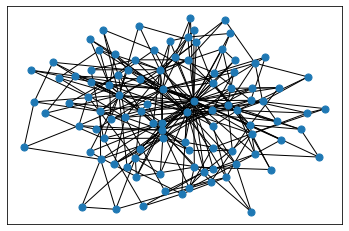

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=50)

### Demonstrating that the powerlaw_cluster_graph is in fact a Scale-Free Small-World Network:

<strong> Showing high average clustering:</strong><br>

Within the networkx library, there is a function that will calculate the average clustering. We will compare this value with the values of small-world  graphs to show that it closely resembles the small-world clustering.

In [12]:
from statistics import mean

swsf_clusters = []
sw_clusters = []
for n in range(100):    
    swsf_graph = nx.powerlaw_cluster_graph(100, 10, 0.5)
    swsf_clusters.append(nx.average_clustering(swsf_graph))
    sw_graph = nx.watts_strogatz_graph(100, 10, 0.5)
    sw_clusters.append(nx.average_clustering(sw_graph))
    
print("The average clustering for SF-SW: ", mean(swsf_clusters))
print("The average clustering for SW:    ", mean(sw_clusters))

The average clustering for SF-SW:  0.34261955685169376
The average clustering for SW:     0.15123125124101897


As you can see from gathering the average clustering for the scale-free small-world network is actually higher than the watts-strogatz graph so the powerlaw_cluster_graph does have the property of high average clustering.<br><br>
<strong> Showing low average distance:</strong><br><br>
Within the networkx library, there is a function that will calculate the average shortest_path_length. This is a property of the small-world network we will show how the powerlaw_cluster_graph resembles this property.

In [13]:
swsf_dist = []
sw_dist = []
for n in range(100):    
    swsf_graph = nx.powerlaw_cluster_graph(100, 10, 0.5)
    sw_graph = nx.watts_strogatz_graph(100, 10, 0.5)
    swsf_dist.append(nx.average_shortest_path_length(swsf_graph))
    sw_dist.append(nx.average_shortest_path_length(sw_graph))
    
print("The average distance for SF-SW: ", mean(swsf_dist))
print("The average distance for SW:    ", mean(sw_dist))

The average distance for SF-SW:  1.8592949494949496
The average distance for SW:     2.2656020202020204


As you can see from the gathering of shortest average distance for the scale-free small-world network, the powerlaw_cluster_graph outperforms the watts_strogatz graph in having a lower average distance. This should confirm that the powerlaw_cluster_graph has the property of low average distance.<br><br>
<strong>Showing power-law degree distribution:</strong><br><br>
To show that the powerlaw_cluster_graph as a power-law degree distribution, we will plot a histogram of the degree distribution on a log-log scale and show a good fit for a line.

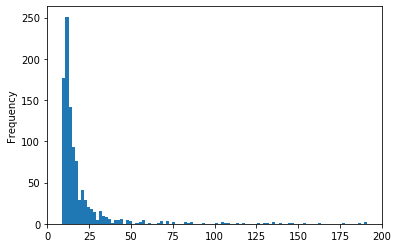

In [14]:
%matplotlib inline

swsf_graph = nx.powerlaw_cluster_graph(1000, 10, 0.5)
degree_sequence = sorted([d for n, d in swsf_graph.degree()], reverse=True)
degree_sequence = pd.Series(degree_sequence)

plt.figure()
degree_sequence.plot.hist(bins = 100)

The shape of the histogram closely resembles the power law with the raw distribution. The log-log scale of the degree distribution will n ow be examined to show a good fit for the line.

[]

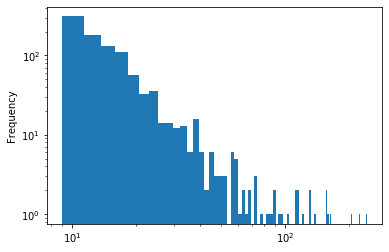

In [15]:
swsf_graph = nx.powerlaw_cluster_graph(1000, 10, 0.5)
degree_sequence = sorted([d for n, d in swsf_graph.degree()], reverse=True)
degree_sequence = pd.Series(degree_sequence)

plt.figure()
hist = degree_sequence.plot.hist(bins = 100)
plt.Axes.loglog(hist)

The shape of the log-log histogram shows that the data distribution roughly shows a linear shape. This is expected for degree distributions that follow the power law. This effectively shows that the distribution roughly follow the power law and that it has this property. For reference, the distribution for the scale-free network, which does have this property, is shown below.

[]

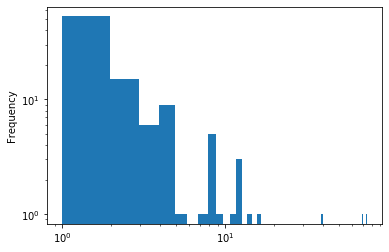

In [16]:
sf_graph = nx.scale_free_graph(100)
degree_sequence = sorted([d for n, d in sf_graph.degree()], reverse=True)
degree_sequence = pd.Series(degree_sequence)

plt.figure()
hist = degree_sequence.plot.hist(bins = 75)
plt.Axes.loglog(hist)

As you can see from above, the scale-free small-world graph follows this distribution closer than the scale-free graph which is depicted above.

<strong>Findings:</strong><br>
The powerlaw_cluster_graph embodies all of the qualities that is necessary for it to be a scale-free small world graph. It has all of the properties from both the scale-free network and the small-world network.

# Part 2: Centrality Correlations

In [17]:
import pandas as pd
import numpy as np
import networkx as nx

data = pd.read_csv("data.csv")
RND = data.loc[data['networkType'] == 'random']
SF = data.loc[data['networkType'] == 'scale-free']
SW = data.loc[data['networkType'] == 'small-world']
SFSW = data.loc[data['networkType'] == 'small-world/scale-free']

In [18]:
allP = data.corr(method ='pearson')
allS = data.corr(method='spearman')
allK = data.corr(method ='kendall')

rndP = RND.corr(method ='pearson')
rndS = RND.corr(method ='spearman')
rndK = RND.corr(method ='kendall')

sfP = SF.corr(method='pearson')
sfS = SF.corr(method='spearman')
sfK = SF.corr(method='kendall')

swP = SW.corr(method='pearson')
swS = SW.corr(method='spearman')
swK = SW.corr(method='kendall')

sfswP = SFSW.corr(method='pearson')
sfswS = SFSW.corr(method='spearman')
sfswK = SFSW.corr(method='kendall')

In [ ]:
allP.to_csv('pairwise/all-pearson.csv')
allS.to_csv('pairwise/all-spearman.csv')
allK.to_csv('pairwise/all-kendall.csv')

rndP.to_csv('pairwise/rnd-pearson.csv')
rndS.to_csv('pairwise/rnd-spearman.csv')
rndK.to_csv('pairwise/rnd-kendall.csv')

sfP.to_csv('pairwise/sf-pearson.csv')
sfS.to_csv('pairwise/sf-spearman.csv')
sfK.to_csv('pairwise/sf-kendall.csv')

swP.to_csv('pairwise/sw-pearson.csv')
swS.to_csv('pairwise/sw-spearman.csv')
swK.to_csv('pairwise/sw-kendall.csv')

In [ ]:
sfswP.to_csv('pairwise/sfsw-pearson.csv')
sfswS.to_csv('pairwise/sfsw-spearman.csv')
sfswK.to_csv('pairwise/sfsw-kendall.csv')

### Correlations Heatmap:

In [100]:
import pandas as pd
df = pd.read_csv('data.csv')

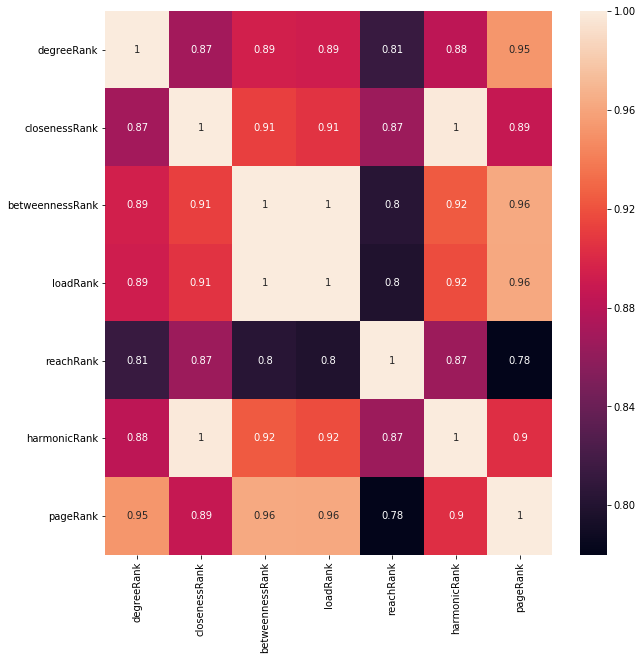

In [21]:
import seaborn as sns

df_corr = df.drop(['instanceNumber', 'nodeNumber', 'networkSize'], axis=1).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, ax=ax)

### Correlation Heatmap Results:

|Centrality Types | Correlations |
|--------------|--------------|
|degreeRank|Strongly correlated with page|
|closenessRank|Perfectly correlated with harmonic, strongly with betweenness and load|
|betweennessRank|Perfectly correlated with load, strongly with page, harmonic, and closeness|
|loadRank|Perfectly correlated with betweenness, strongly with page, harmonic, and closeness|
|reachRank|No strong correlations, medium-strongly correlated with closeness and harmonic|
|harmonicRank|Perfectly correlated with closeness, strongly with betweenness, load, and page|
|pageRank|Strongly correlated with betweenness, load, degree, and harmonic|

## Part 3: Model Generation

### Create Class Outcome Columns:

In [102]:
scale_free = df.loc[df['networkType'] == 'scale-free'] # add these new fields to the dataframe
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

In [103]:
# this cell creates a new dictionary with the max ranking node for each network and centrality type
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

dic={}
centralities = ['degree', 'closeness', 'betweenness', 'load', 'reach', 'harmonic', 'page']
networkTypes = ['scale-free', 'small-world', 'random', 'small-world/scale-free']
for network in networkTypes:
    dic[network]={}
    curNetwork=None
    if network=='scale-free':
        curNetwork=scale_free
    if network=='small-world':
        curNetwork=small_world
    if network=='random':
        curNetwork=random_data
    if network=='small-world/scale-free':
        curNetwork=small_world_scale_free

    for centrality in centralities:
        dic[network][centrality]=curNetwork.groupby(['networkSize','instanceNumber'])[centrality +'Rank'].max()

In [104]:
degreeBinary = [] # create empty lists for adding binary values to dataframe
closenessBinary = []
betweennessBinary = []
loadBinary = []
reachBinary = []
harmonicBinary = []
pageBinary = []

for index, row in df.iterrows(): # iterate through all rows of dataframe
    
    if int(row['degreeRank']) <= int(dic[row['networkType']]['degree'][row['networkSize']][row['instanceNumber']]) / 4: 
        degreeBinary.append(1) # if the rank is in the top 25%, append 1 to binary list
    else:
        degreeBinary.append(0) # else, append a 0
        
    if int(row['closenessRank']) <= int(dic[row['networkType']]['closeness'][row['networkSize']][row['instanceNumber']]) / 4:
        closenessBinary.append(1)
    else:
        closenessBinary.append(0)
        
    if int(row['betweennessRank']) <= int(dic[row['networkType']]['betweenness'][row['networkSize']][row['instanceNumber']]) / 4:
        betweennessBinary.append(1)
    else:
        betweennessBinary.append(0)
        
    if int(row['loadRank']) <= int(dic[row['networkType']]['load'][row['networkSize']][row['instanceNumber']]) / 4:
        loadBinary.append(1)
    else:
        loadBinary.append(0)
        
    if int(row['reachRank']) <= int(dic[row['networkType']]['reach'][row['networkSize']][row['instanceNumber']]) / 4:
        reachBinary.append(1)
    else:
        reachBinary.append(0)
        
    if int(row['harmonicRank']) <= int(dic[row['networkType']]['harmonic'][row['networkSize']][row['instanceNumber']]) / 4:
        harmonicBinary.append(1)
    else:
        harmonicBinary.append(0)
        
    if int(row['pageRank']) <= int(dic[row['networkType']]['page'][row['networkSize']][row['instanceNumber']]) / 4:
        pageBinary.append(1)
    else:
        pageBinary.append(0)
        
df['degreeBinary'] = degreeBinary # append binary lists as columns to the end of the dataframe
df['closenessBinary'] = closenessBinary
df['betweennessBinary'] = betweennessBinary
df['loadBinary'] = loadBinary
df['reachBinary'] = reachBinary
df['harmonicBinary'] = harmonicBinary
df['pageBinary'] = pageBinary

In [105]:
scale_free = df.loc[df['networkType'] == 'scale-free'] # recreate fresh dataframes after previous, sorting step
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

In [106]:
df['reachBinary'].value_counts()

0    196709
1    103291
Name: reachBinary, dtype: int64

In [107]:
# this is to save our progress for any time we want to train a new classifier
# it takes about 6 minutes on a standard 16-core redhawk node to get to this point in the code
df.to_csv('binary_data.csv')

## Binary Balancing Function:

In [108]:
def balance(rows, target):
    zero_rows = rows[rows[target + 'Binary'] == 0]
    one_rows = rows[rows[target + 'Binary'] == 1]
    
    if len(zero_rows) > len(one_rows): 
        # if ones are the minority, remove zeros to equal size
        # chop down zeros to num_ones
        chopping_block = random.sample(list(zero_rows.index), len(zero_rows) - len(one_rows))
        rows = rows.drop(chopping_block)

    else: 
        # if zeros are the minority, remove ones to equal size
        # chop down ones to num_zeros
        chopping_block = random.sample(list(one_rows.index), len(one_rows) - len(zero_rows))
        rows = rows.drop(chopping_block)
    
    return rows

## Classifier Training Function:

In [136]:
def warn(*args, **kwargs): # suppress classifier training warnings
    pass
import warnings
warnings.warn = warn

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import tree
import random
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, KFold, train_test_split
from multiprocessing import Process
from datetime import datetime
import operator
import json

def train_classifier(clf_name, grid_params):
    
    results = clf_name + '_results/'
    with open(results + 'overall_status.csv', 'w') as statusfile: # initialize status file
        statusfile.write('Classifier started: ' + datetime.now().strftime('%m-%d %H:%M:%S') + '\n')
        
    with open(results + 'overall_results.csv', 'w') as clearfile: # clear overall results file
        pass
    
    df = pd.read_csv('binary_data.csv')
    scale_free = df.loc[df['networkType'] == 'scale-free'] # recreate fresh dataframes after previous, sorting step
    small_world = df.loc[df['networkType'] == 'small-world']
    random_data = df.loc[df['networkType'] == 'random']
    small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']
    
    networkTypes = [scale_free, small_world, random_data, small_world_scale_free]
    networkNames = ['Scale-Free', 'Small-World', 'Random', 'Small-World/Scale-Free']
    centralityTargets = ['degree', 'closeness','betweenness','load','reach','harmonic','page']
    
    def create_clf(hyperparams):
        if clf_name == 'dt': return DecisionTreeClassifier(**hyperparams) if hyperparams else DecisionTreeClassifier()
        elif clf_name == 'rf': return RandomForestClassifier(**hyperparams) if hyperparams else RandomForestClassifier()
        elif clf_name == 'nb': return BernoulliNB(**hyperparams) if hyperparams else BernoulliNB()
        elif clf_name == 'sv': return LinearSVC(**hyperparams) if hyperparams else LinearSVC()
        elif clf_name == 'gd': return SGDClassifier(**hyperparams) if hyperparams else SGDClassifier()
        else: raise ValueError('Unsupported classifier name given as input')
    
    def parallel_train(df, network_name, target):
    
        # first, drop unneeded columns and the ranking of our target
        temp = df.copy().drop(['networkType', 'instanceNumber', 'nodeNumber', target + 'Rank'], axis=1)
        
        # then, drop all binary columns except for our target
        temp = temp.drop([x + 'Binary' for x in centralityTargets if x != target], axis=1)
        
        # hold out 20% of data for testing at the end
        temp_train, temp_test = train_test_split(temp, test_size = 0.2, random_state = 42)
        temp_train.reset_index(inplace=True)
        temp_test.reset_index(inplace=True)
        
        # create scoring system for grid parameters
        param_scores = {}
        for params in grid_params:
            param_scores[json.dumps(params)] = 0
            
        # divide our training data into 10 training and validation folds
        kf = KFold(n_splits=10, shuffle=True, random_state = 42)
        for train, test in kf.split(temp_train):

            train_rows = temp_train.loc[train].iloc[:, 2:]
            test_rows = temp_train.loc[test].iloc[:, 2:]

            train_rows = balance(train_rows, target) # balance training data
            
            # split train and test sets into X and y components
            X_train = train_rows.iloc[:, 0:-1]
            y_train = train_rows.iloc[:, -1]
            X_test = test_rows.iloc[:, 0:-1]
            y_test = test_rows.iloc[:, -1]
            
            # perform grid search with every pair of grid parameters to find the best ones
            max_accuracy = 0
            best_params = {}
            for params in grid_params:
                classifier = create_clf(params)
                classifier.fit(X_train, y_train)
                accuracy = accuracy_score(classifier.predict(X_test), y_test)
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_params = params
            
            param_scores[json.dumps(best_params)] += 1
            # end cross fold validation
        
        # awards ceremony
        winner = max(param_scores.items(), key=operator.itemgetter(1))[0]
        winning_params = json.loads(winner)
            
        # after finding the winning hyperparameters, use them to make a final classifier for our original 80/20 holdout
        X_train = temp_train.iloc[:, 0:-1].values
        y_train = temp_train.iloc[:, -1].values
        X_test = temp_test.iloc[:, 0:-1].values
        y_test = temp_test.iloc[:, -1].values
    
        classifier = create_clf(winning_params)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        with open(results + network_name.replace('/','-') + '.csv', 'a') as outresults:
            outresults.write(target + ',')
            outresults.write(str(accuracy_score(prediction, y_test)) + ',')
            outresults.write(str(precision_score(prediction, y_test)) + ',')
            outresults.write(str(recall_score(prediction, y_test)) + ',')
            outresults.write(str(winner) + '\n')
        # end parallel_train()
        
    
    # parallelize each network-name/centrality-target combination = 28 processes on a 16-core CPU
    networkNameIndex = -1
    processIndex = -1
    processes = [x for x in range(len(networkTypes) * len(centralityTargets))]
    for df in networkTypes:
        networkNameIndex += 1
        for target in centralityTargets:
            with open(results + networkNames[networkNameIndex].replace('/','-') + '.csv', 'w') as clearfile:
                pass
            processIndex += 1
            processes[processIndex] = Process(target=parallel_train, args=(df, networkNames[networkNameIndex], target))
            processes[processIndex].start() # deploy process for each networkType/centralityType pair
        
    for i in range(len(processes)): # wait for all processes to finish
        processes[i].join()
    
    # generate average accuracies, precisions, recalls
    for network in networkNames:
        with open(results + network.replace('/','-') + '.csv', 'r') as infile:
            accuracy_sum = 0
            precision_sum = 0
            recall_sum = 0
            count = 0
            line = infile.readline()
            while line:
                accuracy_sum += float(line.split(',')[1])
                precision_sum += float(line.split(',')[2])
                recall_sum += float(line.split(',')[3])
                count += 1
                line = infile.readline()
            avg_accuracy = round(accuracy_sum / count, 4)
            avg_precision = round(precision_sum / count, 4)
            avg_recall = round(recall_sum / count, 4)
            with open(results + 'overall_results.csv', 'a') as outfile:
                outfile.write(network + ',' + str(avg_accuracy) + ',' + str(avg_precision) + ',' + str(avg_recall) + '\n')
    
    # generate overall accuracy, precision, recall
    with open(results + 'overall_results.csv', 'r') as infile:
        accuracy_sum = 0
        precision_sum = 0
        recall_sum = 0
        count = 0
        line = infile.readline()
        while line:
            accuracy_sum += float(line.split(',')[1])
            precision_sum += float(line.split(',')[2])
            recall_sum += float(line.split(',')[3])
            count += 1
            line = infile.readline()
        avg_accuracy = round(accuracy_sum / count, 4)
        avg_precision = round(precision_sum / count, 4)
        avg_recall = round(recall_sum / count, 4)
        with open(results + 'overall_results.csv', 'a') as outfile:
            outfile.write('accuracy: ' + str(avg_accuracy) + '\n')
            outfile.write('precision: ' + str(avg_precision) + '\n')
            outfile.write('recall: ' + str(avg_recall))
            
    with open(results + 'overall_status.csv', 'a') as statusfile: # initialize status file
        statusfile.write('Classifier finished: ' + datetime.now().strftime('%m-%d %H:%M:%S'))
            

## Train Individual Classifiers:

In [141]:
params = {
    'dt': {
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
        'criterion': ['gini', 'entropy'], 
        'min_samples_leaf': [3, 5, 7]
    },
    'rf': {
        'n_estimators': [5, 10, 15, 20, 25],
        'criterion': ['gini', 'entropy'],
        'min_samples_leaf': [3, 5, 7]
    },
    'nb': {
        'alpha': [.60, .80, 1.0, 1.2, 1.4]
    },
    'sv': {
        'loss': ['hinge', 'squared_hinge'],
        'tol': [.00008, .00010, .00012]
    },
    'gd': {
        'loss': ['hinge', 'log', 'modified_huber'],
        'penalty': ['l1', 'l2']
    }
}

train_classifier('gd', ParameterGrid(params['gd'])) # train_classifier creates 28 processes... so plan accordingly